# Simple Analysis of Experimental Data

In [95]:
import os, re
import pandas, numpy
from matplotlib import pyplot

In [91]:
# globals

## Basic Information of Each Experiment

In [103]:
root: str = '../00-data'
file: str = os.listdir(root)
filenamesegs: list[list[str]] = []
F: list[pandas.DataFrame] = []
for f in file:
    F.append(pandas.read_csv(os.path.join(root, f)))
    filenameseg: list[str] = os.path.splitext(f)[0].split('_')
    F[-1]['trial number'] = filenameseg[0]
    F[-1]['browser'] = filenameseg[1]
    F[-1]['push enabled'] = filenameseg[2]
    F[-1]['push freq'] = filenameseg[3]
    if len(filenameseg) > 4:
        F[-1]['push type'] = filenameseg[4]
    else:
        F[-1]['push type'] = ''
    filenamesegs.append(filenameseg)
F.sort(key=lambda F: int(re.search(r'\d+', F['trial number'].iat[0])[0]))
file.sort(key=lambda file: int(re.search(r'\d+', file)[0]))
filenamesegs.sort(key=lambda filenameseg: int(re.search(r'\d+', filenameseg[0])[0]))

summary_table: pandas.DataFrame = pandas.DataFrame(columns=['trial', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
for i in range(len(file)):
    summary_table.loc[i] = [F[i]['trial number'].iat[0][len('trial'):], F[i]['Energy trapz (J)'].mean(), F[i]['Energy trapz (J)'].std(), F[i]['Energy trapz (J)'].min(), F[i]['Energy trapz (J)'].quantile(.25), F[i]['Energy trapz (J)'].quantile(.5), F[i]['Energy trapz (J)'].quantile(.75), F[i]['Energy trapz (J)'].max()]
print(summary_table)

   trial       mean       std        min        25%        50%        75%  \
0      1  46.231307  2.426237  35.072987  45.928497  46.741965  47.259847   
1      2  48.062190  2.258378  40.902735  46.846682  47.755688  49.694906   
2      3  46.470891  3.662616  31.836826  46.146616  47.540395  48.074592   
3      4  57.632000  3.423639  51.963999  55.341675  57.469885  59.927178   
4      5  55.722850  2.122315  51.884041  54.424580  55.193935  56.616161   
5      6  48.189717  2.522297  37.548153  47.311992  48.392537  49.191719   
6      7  58.437859  2.805958  48.695347  57.336675  58.346660  59.243773   
7      8  49.843350  3.662060  44.956803  47.265066  49.259037  51.661101   
8      9  94.305340  2.917315  89.148392  93.149923  94.364058  95.955611   
9      9  97.039512  3.055706  88.414902  95.385195  97.402010  98.997388   
10    10  51.972236  2.068648  48.801221  50.829314  51.462484  53.020023   
11    10  56.940672  3.693577  50.967490  54.623640  56.768706  58.160443   

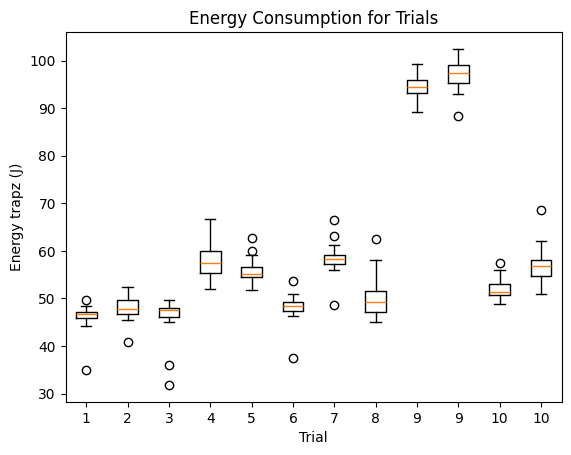

In [93]:
merged_energy_data: list[pandas.Series] = []
for f in F:
    merged_energy_data.append(f['Energy trapz (J)'])

fig, ax = pyplot.subplots()
ax.set_title('Energy Consumption for Trials')
ax.boxplot(merged_energy_data)
ax.set_xlabel('Trial')
ax.set_ylabel('Energy trapz (J)')
xticklabels: list[str] = []
for filenameseg in filenamesegs:
    xticklabels.append(re.search(r'\d+', filenameseg[0])[0])
ax.set_xticklabels(xticklabels)
pyplot.show()